# Homework Assignment #2 (Individual)
## Pandas Review, Python Classes, and ABM

### <p style="text-align: right;"> &#9989; Rajmeet Singh Chandok</p>
### <p style="text-align: right;"> &#9989; rajmeet</p>

### Goals for this homework assignment
By the end of this assignment, you should be able to:
* Use Git to create a repository, create a new branch, merge branches, track changes to the files within the repository, and push those changes to a remote repository.
* Use your Pandas skills to load and explore some data and visualize it with seaborn.
* Read and write Python classes, including classes that leverage object inheritance and composition.
* Run and agent based model simulation.

Work through the following assignment, making sure to follow all of the directions and answer all of the questions.

There are **98 points** possible on this assignment. Point values for each part are included in the section headers and question prompts.

**This assignment is due in roughly two weeks from now at 11:59 pm on Friday, February 18.** It should be uploaded into the "Homework Assignments" submission folder for Homework #2.  Submission instructions can be found at the end of the notebook.

---
## Part 1: Add to your Git repository to track your progress on your assignment (6 points)

For this assignment, you're going to add it to the `cmse202-s22-turnin` repository you created in class so that you can track your progress on the assignment and preserve the final version that you turn in. In order to do this you need to

**&#9989; Do the following**:

1. Navigate to your `cmse202-s22-turnin` repository and create a new directory called `hw-02`.
2. Move this notebook into that **new directory** in your repository, then **add it and commit it to your repository**.
1. Finally, to test that everything is working, "git push" the file so that it ends up in your GitHub repository.

**Important**: Double check you've added your Professor and your TA as collaborators to your "turnin" repository (you should have done this in the previous homework assignment).

**Also important**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the notebook, **none of your changes will be tracked**!

If everything went as intended, the file should now show up on your GitHub account in the "`cmse202-s22-turnin`" repository inside the `hw-02` directory that you just created.  Periodically, **you'll be asked to commit your changes to the repository and push them to the remote GitHub location**. Of course, you can always commit your changes more often than that, if you wish.  It can be good to get into a habit of committing your changes any time you make a significant modification, or when you stop working on the project for a bit.

&#9989; **Do this**: Before you move on, put the command that your instructor should run to clone your repository in the markdown cell below.

```git clone https://github.com/Rajmeet/cmse202-s22-turnin.git```

&#9989; **Do this**: Before you move on, create a new branch called `hw02_branch` and move into it. In the cell below put the command(s) to create a new branch and to checkout the new branch. (_Note_: your TA will be able to see if you have created the branch and its history).

```git checkout -b hw02_branch``` 

**You MUST work in this new branch and merge it at the end.**

---
<img src=https://imgs.xkcd.com/comics/hertzsprung_russell_diagram_2x.png width=300px align=right >

## Part 2: Load, manipulate, and visualize data with Pandas (21 points)

For this part of the assignment, you're going to brush off your Pandas skills and your data manipulation and visualization skills. Throughout the course we'll continue to work with data, so this should be a good opportunity to remind yourself of some tools and techniques you picked up in CMSE 201 or perhaps learn something new.

Let's recreate the [Hertzsprung-Russell](https://en.wikipedia.org/wiki/Hertzsprung%E2%80%93Russell_diagram) diagram. Download the file `stars.csv` and place it in the same folder as this notebook.

You can download the file from here:

`https://raw.githubusercontent.com/msu-cmse-courses/cmse202-S22-data/main/code_samples/stars.csv`



In [1]:
!curl https://raw.githubusercontent.com/msu-cmse-courses/cmse202-S22-data/main/code_samples/stars.csv -O

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  8487  100  8487    0     0   436k      0 --:--:-- --:--:-- --:--:--  436k


&#9989; **Question 2.1 (2 points)**: To get started, **read in the `stars.csv` dataset using Pandas** and then use Pandas to display the first 15 rows of the data.

In [2]:
import pandas as pd
stars = pd.read_csv('stars.csv')
stars.head(15)

,Temperature (K),Luminosity (L/Lo),Radius (R/Ro),Absolute magnitude (Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.120,0,Red,M
1,3042,0.000500,0.1542,16.600,0,Red,M
2,2600,0.000300,0.1020,18.700,0,Red,M
3,2800,0.000200,0.1600,16.650,0,Red,M
4,1939,0.000138,0.1030,20.060,0,Red,M
5,2840,0.000650,0.1100,16.980,0,Red,M
6,2637,0.000730,0.1270,17.220,0,Red,M
7,2600,0.000400,0.0960,17.400,0,Red,M
8,2650,0.000690,0.1100,17.450,0,Red,M
9,2700,0.000180,0.1300,16.050,0,Red,M


As usual this dataset needs to be cleaned a little bit. Note that the star type is a number that doesn't really tell us much. Fortunately, we have asked our astro friends to give us more information and they told us what the numbers stand for.

&#9989; **Question 2.2 (3 points)**: Drop the `Absolute magnitude (Mv)` column, replace the values in the column `Star type` with the following list, print the resulting dataframe

    0 -> Brown Dwarf
    1 -> Red Dwarf
    2 -> White Dwarf
    3 -> Main Sequence
    4 -> Supergiant
    5 -> Hypergiant

You should use the [`replace`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html) method of the dataframe.

In [3]:
stars = stars.drop("Absolute magnitude (Mv)", axis=1)
stars

,Temperature (K),Luminosity (L/Lo),Radius (R/Ro),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,0,Red,M
1,3042,0.000500,0.1542,0,Red,M
2,2600,0.000300,0.1020,0,Red,M
3,2800,0.000200,0.1600,0,Red,M
4,1939,0.000138,0.1030,0,Red,M
...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,5,Blue,O
236,30839,834042.000000,1194.0000,5,Blue,O
237,8829,537493.000000,1423.0000,5,White,A
238,9235,404940.000000,1112.0000,5,White,A


In [4]:
stars['Star type'].replace([0,1,2,3,4,5],['Brown Dwarf','Red Dwarf','White Dwarf','Main Sequence','Supergiant','Hypergiant'], inplace=True)
stars.head(10)

,Temperature (K),Luminosity (L/Lo),Radius (R/Ro),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,Brown Dwarf,Red,M
1,3042,0.000500,0.1542,Brown Dwarf,Red,M
2,2600,0.000300,0.1020,Brown Dwarf,Red,M
3,2800,0.000200,0.1600,Brown Dwarf,Red,M
4,1939,0.000138,0.1030,Brown Dwarf,Red,M
5,2840,0.000650,0.1100,Brown Dwarf,Red,M
6,2637,0.000730,0.1270,Brown Dwarf,Red,M
7,2600,0.000400,0.0960,Brown Dwarf,Red,M
8,2650,0.000690,0.1100,Brown Dwarf,Red,M
9,2700,0.000180,0.1300,Brown Dwarf,Red,M


&#9989; **Question 2.3 (4 points)**: What built-in Pandas functions can you use to get a quick statistical summary of your data (e.g. the mean, standard deviation, min, max, etc) divided by star type? **Use this function to summarize the data for each star type and then answer the following questions**: 

1. How many stars are for each type?
2. Which star type has the highest mean temperature?

In [5]:
stars.groupby('Star type').describe()

Temperature (K)                                            \
                        count       mean           std     min      25%   
Star type                                                                 
Brown Dwarf              40.0   2997.950    332.276295  1939.0  2812.75   
Hypergiant               40.0  11405.700  11816.991886  3399.0  3603.75   
Main Sequence            40.0  16018.000  10661.234972  4077.0  7479.25   
Red Dwarf                40.0   3283.825    269.637258  2621.0  3132.75   
Supergiant               40.0  15347.850  10086.784628  3008.0  6899.50   
White Dwarf              40.0  13931.450   4957.655189  7100.0  9488.75   

                                          Luminosity (L/Lo)                 \
                   50%       75%      max             count           mean   
Star type                                                                    
Brown Dwarf     2935.0   3242.50   3531.0              40.0       0.000693   
Hypergiant      3766.0  18976.00  38940.0              40.0  309246.525000   
Main Sequence  12560.5  23030.00  39000.0              40.0   32067.386275   
Red Dwarf       3314.0   3527.50   3692.0              40.0       0.005406   
Supergiant     12821.0  23181.25  40000.0              40.0  301816.250000   
White Dwarf    13380.0  17380.00  25000.0              40.0       0.002434   

               ...                             Radius (R/Ro)               \
               ...            75%          max         count         mean   
Star type      ...                                                          
Brown Dwarf    ...       0.000737       0.0056          40.0     0.110015   
Hypergiant     ...  365957.500000  849420.0000          40.0  1366.897500   
Main Sequence  ...   12962.500000  204000.0000          40.0     4.430300   
Red Dwarf      ...       0.006675       0.0390          40.0     0.348145   
Supergiant     ...  344160.000000  813000.0000          40.0    51.150000   
White Dwarf    ...       0.001227       0.0560          40.0     0.010728   

                                                                          \
                      std       min          25%        50%          75%   
Star type                                                                  
Brown Dwarf      0.025783    0.0570     0.093150     0.1060     0.120250   
Hypergiant     255.561357  708.9000  1193.000000  1352.5000  1525.000000   
Main Sequence    2.801390    0.7950     1.287500     5.7125     6.367500   
Red Dwarf        0.154453    0.0980     0.240000     0.3380     0.409750   
Supergiant      27.656826   12.0000    25.750000    43.5000    80.250000   
White Dwarf      0.001725    0.0084     0.009305     0.0102     0.012025   

                         
                    max  
Star type                
Brown Dwarf       0.190  
Hypergiant     1948.500  
Main Sequence    10.600  
Red Dwarf         0.730  
Supergiant       98.000  
White Dwarf       0.015  

[6 rows x 24 columns]

From the above analysis we can observe that 
1. There are **40 stars** for each type with 240 stars in total
2. The star **Main Sequence** has the highest mean temperature with 16018 K

**<font size=+3>&#9998;</font> Do This**: *Record your observations of your plot here.*

&#9989; **Question 2.4 (7 points)**: Using `seaborn` make a plot equivalent to what `scatter_matrix` would produce ([_Hint_](https://seaborn.pydata.org/examples/index.html) ) and set the `hue` option equal to `Star type`. Then answer the following questions

1. What does the diagonal represent? How is that different from the diagonal of `scatter_matrix`?
2. What do the spikes in the diagonal tell you ? How are they related to the print out of the cell above ?
3. Can you see clear distinctions between different star types?

1. The diagonals represent the same paramter or the same column against them. Like Temperature vs Temperature or Luminosity vs Luminosity and Radius vs Radius. Scatter_matrix plots each column against another.
2. The spikes in the diagonal are the peaks in the histogram of the scatter plot. tell us the different variations in the values. Being a same vs same graph, we can see what the stars have in common and what's their differences. 
3. It is able to give us some information about the types but it's still hard to tell just by looking at it.

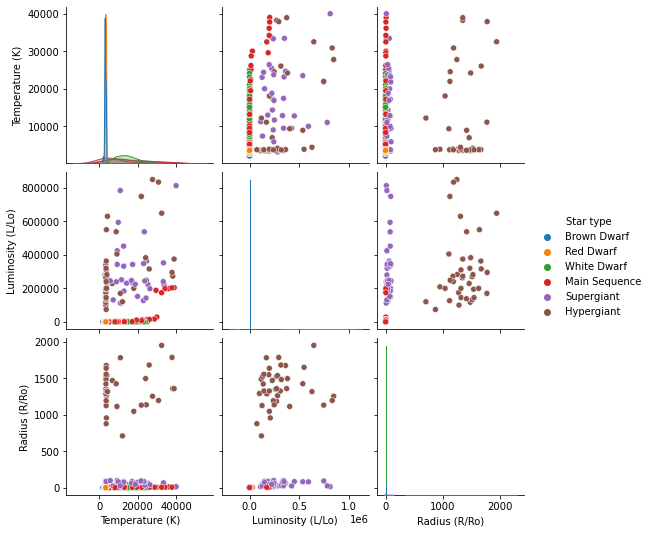

In [6]:
import seaborn as sns
sns.pairplot(stars, hue='Star type')

Let's make the Hertzsprung-Russell diagram.

&#9989; **Question 2.5 (3 points)**: Use `seaborn` to make a scatter plot of the data with:
- Temperature on the $x$-axis and Luminosity on the $y$-axis and label them
- Use the column `Star type` for your `hue` parameter
- Make the $x$-axis and $y$-axis **log** scaled


Compare your plot with the one [here](https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.eso.org%2Fpublic%2Fimages%2Feso0728c%2F&psig=AOvVaw0vMZoAEnGtjcWQspl1IgVK&ust=1644303543060000&source=images&cd=vfe&ved=0CAgQjRxqFwoTCJjJ1J6C7fUCFQAAAAAdAAAAABAD). Notice that your plot is flipped! This is because the Temperature increases towards the left!!! You can fix this by adding this line to the end of your code

    plt.gca().invert_xaxis()

**NOTE:** This is not necessary. It is just so that the astrophycisists don't get mad 	&#128516;

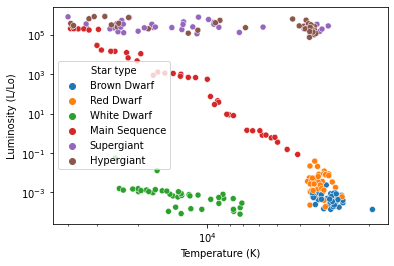

In [7]:
import matplotlib.pyplot as plt
sns.scatterplot(x=stars['Temperature (K)'], y=stars['Luminosity (L/Lo)'], hue=stars['Star type'])
plt.xscale("log")
plt.yscale("log")
plt.gca().invert_xaxis()

&#9989; **Question 2.6 (3 points)**: One of star type is obviously easier to separate than the others. Can you use a Boolean mask on the dataframe and isolate that one species **using `Temperature` and `Luminosity` and *not the star type***? Try to do so below and confirm that you were successful.

Why weren't we able to see such a pattern in the previous plot?


We were not able to see such a pattern with the previous plot because we not did not use the log scale. With Luminosity values being really low and temperature values really high we were not able to get a good estimate of the graph.

In [8]:
print(stars[(stars['Temperature (K)'] <= 25000.0) & (stars['Temperature (K)'] >= 7100.0) & (stars['Luminosity (L/Lo)'] <= 0.0560)].shape)
stars[(stars['Temperature (K)'] <= 25000.0) & (stars['Temperature (K)'] >= 7100.0) & (stars['Luminosity (L/Lo)'] <= 0.0560)].head()

(40, 6)


,Temperature (K),Luminosity (L/Lo),Radius (R/Ro),Star type,Star color,Spectral Class
20,25000,0.05600,0.00840,White Dwarf,Blue White,B
21,7740,0.00049,0.01234,White Dwarf,White,A
22,7220,0.00017,0.01100,White Dwarf,White,F
23,8500,0.00050,0.01000,White Dwarf,White,A
24,16500,0.01300,0.01400,White Dwarf,Blue White,B


We can tell the mask is working correctly as it gives us 40 values and all belong to the same star type which is White Dwarf. We were able to get this by using the table from 2.3 and identifying the max and min values for Temp and Luminosity.

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "Committing Part 2", and push the changes to GitHub. If you want you can merge your changes with the `main` branch, but you must checkout branch `hw_02` for Part 3.

---

## Part 3: Writing Python classes (44 points)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/00/Standard_Model_of_Elementary_Particles.svg/627px-Standard_Model_of_Elementary_Particles.svg.png" alt="Image credit: www.wikipedia">

### 3.1 Using and enhancing a pre-existing class (16 points)

For this section, you're going to explore a little bit of particle physics, by expanding on the pre-existing Python class contained in a file called `standard_model.py`. You'll need to download this script and put it in the same location as this notebook. **You should also add it and commit it to your repository in the same `hw-02` folder**. You will also **turn in your final version of this script into D2L along with your notebook**.

You can download the file from here:

`https://raw.githubusercontent.com/msu-cmse-courses/cmse202-S22-data/main/code_samples/standard_model.py`

The Python class contained in this script is called `ElementaryParticle` and, not surprisingly, it is designed to store information about the building blocks of the universe. Currently it only has few simple methods. 

Let's first confirm that you've got the script in the right place and that everything imports and runs correctly.

**&#9989; Do this:** Execute the cell below to makes sure that your newly downloaded `ElementaryParticle` class is working correctly. It should run without errors

In [9]:
!curl https://raw.githubusercontent.com/msu-cmse-courses/cmse202-S22-data/main/code_samples/standard_model.py -O

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1946  100  1946    0     0  92666      0 --:--:-- --:--:-- --:--:-- 92666


In [10]:
# The "magic" command below tells Jupyter Notebook to automatically load classes and methods from external files 
# in case they have changed from last load time;
# This is needed when you change the standard_model.py file
%reload_ext autoreload
%autoreload 2

from standard_model import ElementaryParticle

# Create two particles
electron = ElementaryParticle(mass = 0.5, charge = -1., spin = 1./2.)
photon = ElementaryParticle(mass = 0.0, spin = 1.0, charge = 0.0)

print("{:=^60}".format(" Electron "))
electron.info()
print("{:=^60}".format(" Photon "))
photon.info()

========================= Electron =========================
The particle has a mass of 0.5 MeV
The particle's charge is -1.0 e
The particle's spin is 0.5
========================== Photon ==========================
The particle has a mass of 0.0 MeV
The particle's charge is 0.0 e
The particle's spin is 1.0


**&#9989; Question 3.1.1 (3 points):** Notice something strange? The order of the inputs is different than the one in the script `ElementaryParticle.py`. Nonetheless we get the right answer when we print out the values. Read this [article](https://www.geeksforgeeks.org/args-kwargs-python/) and answer these questions:

1. What is the difference between `args` and `kwargs`?
2. Which of the two types of arguments I am using in the above instantiation of particles?
3. Why do I get the right answer?

**<font size=+3>&#9998;</font>**
1. Kwargs are keyword arguments while args are non keyword arguments. 
2. Keyword arguemnts and kwargs
3. We get the right answer because we are sending in the value through keyword arguments and that way it just assigns the value to it.

**&#9989; Question 3.1.2 (9 points); Make sure to read _everything_ carefully!:** Using this class as a starting point, your goal is to do the following:

* Add a new attribute, `ptype`, to the class so that it is set to a default of `None` when the class object is first initialized. This attributes will indicate whether the particle is a boson or a fermion.
* Add another class method, called `check_type`, that takes no input. **This method should:**
    - check whether the particle is a "fermion" or a "boson". Bosons have integer spin, fermions have fractional spin. *Hint*: look at the built-in methods of [`float`](https://docs.python.org/3/library/stdtypes.html#additional-methods-on-float). Is there one that could help you answer this question?
    - update the attribute `ptype` with the type of particle, `"fermion"` or `"boson"`.
    - return the attribute `ptype`.
* Add a new class method, called `compare`, that takes **one input**, called `other`. Using this input, **this method should**:
    1. Check that `other` is an instance of the `ElementaryParticle` class. [Hint](<https://letmegooglethat.com/?q=How+do+I+check+if+an+object+is+an+instance+of+a+given+class+python>).
    2. If so it must print to screen whether their charges are equal, whether their masses are equal, whether their spin are equal.
    3. If `other` is not a particle raise an error message that requests the user to pass a valid particle. [Hint](https://stackoverflow.com/questions/2052390/manually-raising-throwing-an-exception-in-python).

In order to check that everything is working correctly, **run the following cell**. It should not return any errors and should print the following:

    ======================== Check Type ========================
    fermion
    boson
    ======================== Comparison ========================
    Electron vs Photon
    The two particles have the same charge: False
    The two particles have the same mass: False
    The two particles have the same spin: False

In [12]:
# The "magic" command below tells Jupyter Notebook to automatically load classes and methods from external files 
# in case they have changed from last load time;
# This is needed when you change the standard_model.py file
%reload_ext autoreload
%autoreload 2

from standard_model import ElementaryParticle

# Create two particles
up_quark = ElementaryParticle(charge = 1./3, mass = 2.2,  spin = 1./2.)
gluon = ElementaryParticle(charge = 0.0, mass = 0.0, spin = 1.0)

# Fermions or Bosons?
print("{:=^60}".format(" Check Type "))
print(f"{up_quark.check_type()}")
print(f"{gluon.check_type()}")

# Compare
print("{:=^60}".format(" Comparison "))
print("Up Quark vs Gluon")
up_quark.compare(gluon)

======================== Check Type ========================
fermion
boson
======================== Comparison ========================
Up Quark vs Gluon
The two particles have the same charge: False
The two particles have the same mass: False
The two particles have the same spin: False


**&#9989; Question 3.1.3 (2 points):** You should practice writing [docstrings](https://www.programiz.com/python-programming/docstrings) in your script so that it is clear what your methods are doing! You can look at the provided code to get a sense for how this is done.

- Did you write docstring for both methods? What type of inputs does `compare` take?

Run the following code you should not get any error. 

In [13]:
print("\n{:=^50}".format(" Documentation for check_type "))
print(ElementaryParticle.check_type.__doc__)
#
print("\n{:=^50}".format(" Documentation for compare "))
print(ElementaryParticle.compare.__doc__)


========== Documentation for check_type ==========
Checks if type is boson or fermion

=========== Documentation for compare ============
Compares the charge, mass and spin of the other particle
        
        Parameters
        ----------
        other: ElementaryParticle
        


#### Testing _all_ of your code is important!

Any time you write new code, you should get in the habit of trying to test it to make sure it is working as intended, but we didn't check **all** of your new functionality in the code cell above.

**&#9989; Question 3.1.4 (2 points):** Is everything working correctly if you don't pass an `ElementaryParticle` to the `compare` method?

**Write some code that proves that your `compare` method is working correctly when you are not passing an `ElementaryParticle` object.** You have some options for how you might do this. 

*Remember*, if you're editing your script and testing things out, you may need to make sure your class is being imported again to ensure that you're using the newest version of your script.

In the markdown cell below your code, **explain how you know that your method is working correctly based on the code that you provided**.


In [14]:
from standard_model import ElementaryParticle

random_particle1 = ElementaryParticle(charge = 1./3, mass = 2.2,  spin = 6)
random_particle2 = ElementaryParticle(charge = 1./5, mass = 1./2,  spin = 2)

random_particle1.compare(random_particle2)
random_particle1.compare(2)

The two particles have the same charge: False
The two particles have the same mass: False
The two particles have the same spin: False


TypeError: Not a particle

**<font size=+3>&#9998;</font>** We are able to compare multiple particles and it works as it should. Moreover when sending a object that's not an elementary particle it gives an error.

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "Committing part 3.1", and push the changes to GitHub. **Make sure you've added your version of `standard_model.py` to your repository!**

---

### 3.2 Inheritance and Composition (28 points)

Once we've built a class, if we decide we need some sort of specialized functionality, we can create a new class that inherits all of the properties of the first one. Let's do that now!

As you can see in the figure above there are different type of particles: quarks, leptons, gauge bosons, and scalar bosons. Our `ElementaryParticle` class has all the functionalities and properties common amongst all these particles, but all the particles fall into one of two categories: fermions or bosons.
Fermions are particles that create matter while bosons are called force carriers. _SideNote_: Anytime two charges  repel/attract each other their are exchanging photons amongst them. &#129299;

**&#9989; Question 3.2.1 (18 points)**: Now that you have a functioning class, your next task is to create two new classes, `Fermion` and `Boson`, that **inherit** the `ElementaryParticle` class. **You should create this new class in the same `standard_model.py` script.** When you're done, there should be three different classes available to be imported from the script: `ElementaryParticles`, `Fermion`, `Boson`.

The new `Boson` class, has the following documentation:

    """
    Boson: elementary particle that obeys Bose-Einstein statistics.
    This class inherits the ElementaryParticle class with all its attributes and methods.
    Further attributes and methods are
    
    Attributes
    ----------
    name: str
        Name of the particle.
    
    Methods
    -------
    check_existence()
        Checks whether this Boson can exists by calling its parent's method check_type()
        Raises a ValueError if check_type() returns "fermion"
            
    """
    
The new `Fermion` class has the following documentation:

    """
    Fermion: elementary particle that obeys Fermi-Dirac statistics.
    This class inherits the ElementaryParticle class with all its attributes and methods.
    Further attributes and methods are
    
    Attributes
    ----------
    name: str
        Name of the particle.
    
    Methods
    -------
    check_existence()
        Checks whether this Fermion can exists by calling its parent's method check_type()
        Raises a ValueError if the check_type() returns "boson"
        
    is_antiparticle(other):
        Check whether other is the anti-particle of this Fermion 
        by checking if other is an instance of Fermion first.
    
    """
* These documentations tell you what methods and attributes you need to write. 

* Both classes should have an `__init__` method that takes in four arguments: `name`, `charge`, `mass`, `spin`. This method should use `ElementaryParticle`'s `__init__` method to initialize the last three attributes. In addition this method should call the method `check_existence` to verify that we have passed the correct arguments. See documentation above.

* As mentioned in the documentation the `Fermion` class should have a new class method, `is_antiparticle`, that takes one input, `other`, and verifies whether it is the antiparticle. An antiparticle is an exact copy of a particle with the only difference that the antiparticle has the opposite sign. As an example see [electron](https://en.wikipedia.org/wiki/Electron) and [positron](https://en.wikipedia.org/wiki/Positron). This method should check whether other is an instance of a `Fermion` and return `True` if `other` is an antiparticle or `False` if it is not.

* Copy the above docstrings into your code.

Run the following code as a first check. You should get this result
```
======================== Comparison ========================
Electron vs Positron
True
```

In [15]:
# The "magic" command below tells Jupyter Notebook to automatically load classes and methods from external files 
# in case they have changed from last load time;
# This is needed when you change the standard_model.py file
%reload_ext autoreload
%autoreload 2

from standard_model import ElementaryParticle, Fermion, Boson

# Create two particles
electron = Fermion(name = "electron", charge = -1., mass = 0.5,  spin = 1./2.)
positron = Fermion(name = "positron", charge = 1.0, mass = 0.5, spin = 0.5)

# Compare
print("{:=^60}".format(" Comparison "))
print("Electron vs Positron")
print(f"{electron.is_antiparticle(positron)}")

======================== Comparison ========================
Electron vs Positron
True


#### Testing _all_ of your code is important!

Any time you write new code, you should get in the habit of trying to test it to make sure it is working as intended, but we didn't check **all** of your new functionality in the code cell above.

**&#9989; Question 3.2.2 (2 points):** Is everything working correctly? What happens when you create a boson with fractional spin? What happens if you try the anti-particle has a different mass?

**Write some code that proves that your methods are working correctly**. You have some options for how you might do this. 

*Remember*, if you're editing your script and testing things out, you may need to make sure your class is being imported again to ensure that you're using the newest version of your script.

In the markdown cell below your code, **explain how you know that your method is working correctly based on the code that you provided**.


In [20]:
f1 = Fermion(name = "f1", charge = -1., mass = 0.5,  spin = 1./2.)
b1 = Boson(name = "b1", charge = 1.0, mass = 0.5, spin = 0.5)
f1.is_antiparticle(b1) # should be false 

False

**<font size=+3>&#9998;</font> Do This** - We know the code works because we were able to make two objects of it. One a boson and another one a fermion. Moreover when checking if boson is an antiparticle for a fermion it returns false.

Ok, now we have the building blocks to start creating more complex particles. 

**&#9989; Question 3.2.3 (8 points)**: Create a new class called `CompositeParticle`. **You should create this new class in the same `standard_model.py` script.** When you're done, there should be four different classes available to be imported from the script: `ElementaryParticles`, `Fermion`, `Boson`, `CompositeParticle`.


The new `CompositeParticle` class has the following documentation:

    """
    A particle composed of several elementary particles.
    
    Parameters
    ----------

    name: str
        Name of the particle.

    particles : list
        List of particles objects that compose this particle.
    
    charge : float
        Electric charge of the particle.

    mass : float
        Rest mass in MeV of the particle.

    spin: float
        Spin of the particle.
        
    """
* These documentations tell you what attributes you need to write. 

* This classes should have an `__init__` method that takes in two arguments: `name`, `particles`. This method should assign the charge, mass, and spin attributes by calculating the sum of the respective attributes of the elements of `particles`.

* In the following cell create a new `CompositeParticle` called `pion` from the union of an up quark and a down antiquark. Print the value of the charge of the pion. _Note for the physicists_: this is not a real pion so don't expect to obtain the correct spin.

* Copy the above docstring into your code.


In [22]:
from standard_model import ElementaryParticle, Fermion, Boson, CompositeParticle

pion = CompositeParticle("pion", [Fermion("up quark", mass=2.2, charge=2/3, spin=1/2), Fermion("down quark", mass=4.7, charge=1/3, spin=1/2)])
pion.charge # 2/3 + 1/3 = 3/3 = 1

1.0

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "Committing part 3.2", and push the changes to GitHub. **Make sure you've added and committed your newest version of `standard_model.py` to your repository!**

---

## Part 4: Creating an ABM universe (26 points)

Let's create our universe. You'll need to download the `universe.py` script and put it in the same location as this notebook. **You should also add it and commit it to your repository in the same `hw-02` folder**. You will also **turn in your final version of this script into D2L along with your notebook**.

You can download the file from here:

`https://raw.githubusercontent.com/msu-cmse-courses/cmse202-S22-data/main/code_samples/universe.py`


In [23]:
!curl https://raw.githubusercontent.com/msu-cmse-courses/cmse202-S22-data/main/code_samples/universe.py -O

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2496  100  2496    0     0   121k      0 --:--:-- --:--:-- --:--:--  121k


**&#9989; Question 4.1 (11 points)**: The Python class contained in this script is called `Universe` and, not surprisingly, it is designed to implement a simple ABM of the universe. However, it is lacking some information. 

1. Write docstrings for the methods.
2. Complete the `evolve` method. It has a docstring that explains what it should do.
3. Answer the questions in the `check_interaction` method.

**<font size=+3>&#9998;</font> 
1. The pop removes an element or in our case a particle from the fermion list.
2. We are popping the element before it because in the interaction it ends up destroying both the particles and hence it needs to be removed.
3. The continue in this statement skips the current loop iteration and goes to the next particle of ip2.
4. The continue in this statment exists out of the if block and the the second loop iteration and continues with the next particle in the fermions list

There's a main loop that iterates over the entire fermion list. There is another loop inside this loop that looks at all the elements and their interaction with the element. So if I am at the first index it will compare the first index with all others. This is done using the first continue statement(4). Once we have seen it's interaction, the loop with go to the second index using the second continue statement(5) and check it's interaction with the rest of the list. It does that for the entire list.

Run the following cell to initialize our universe

In [24]:
# The "magic" command below tells Jupyter Notebook to automatically load classes and methods from external files 
# in case they have changed from last load time;
# This is needed when you change the universe.py file
%reload_ext autoreload
%autoreload 2
%pylab
%matplotlib inline

from IPython.display import display, clear_output

from standard_model import Fermion, Boson
from universe import Universe

my_uni = Universe(width = 200 , height = 200)

np.random.seed(123456789)

# Create the universe with a list of particles
for p in range(200):
    my_uni.fermions.append(
        Fermion( 
            name = f"electron_{p}",
            charge = 1.0,
            mass = 0.5,
            spin = 0.5
        )
    )
    my_uni.fermions.append(
        Fermion( 
            name = f"positron_{p}",
            charge = -1.0,
            mass = 0.5,
            spin = 0.5
        )
    )
    my_uni.bosons.append(
        Boson( 
            name = f"photon_{p}",
            mass = 0., 
            charge = 0.0, 
            spin = 1.0
        )
    )

# Group both sets of particles in one list. You will see later how this is useful.
my_uni._all_particles = [*my_uni.fermions, *my_uni.bosons]

print("Done")

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib
Done



**&#9989; Question 4.2 (6 points)**: We need to initialize the position of each particle. In the next cell randomly place each particle inside the confines of `my_uni` and make a new plot of the universe with the particles.

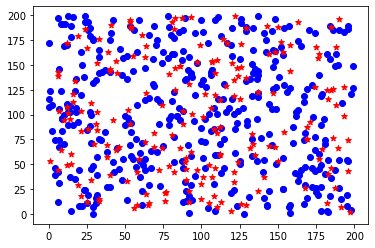

In [25]:
for part in my_uni._all_particles:
    cord = (random.randint(0, 200), random.randint(0, 200))
    part.place_at(cord)
my_uni.draw()

**&#9989; Question 4.3.1 (9 points):**  Let's run our ABM simulation. The following cell though will throw an error. Fix the error and then print the number of fermion annihilated and the number of boson created at each timestep. 

In [27]:
print(len(my_uni.fermions))
print(len(my_uni.bosons))

400
200


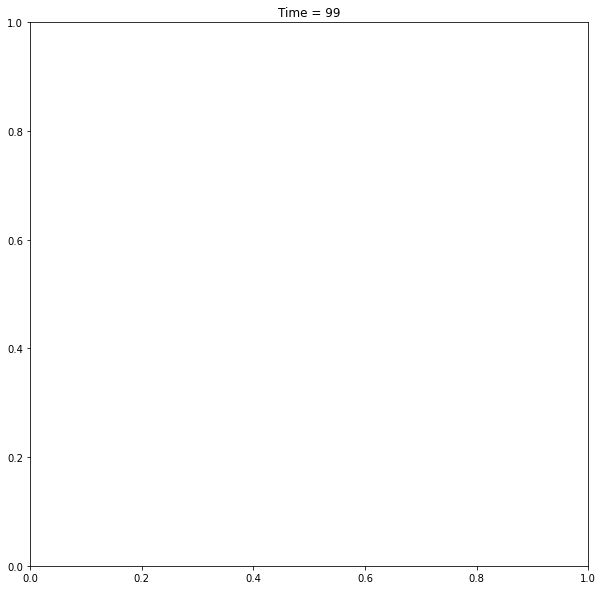

Total time = 10.624296426773071
[0.09326457977294922, 0.19580459594726562, 0.2990577220916748, 0.40248799324035645, 0.5057427883148193, 0.6093800067901611, 0.7120656967163086, 0.8157773017883301, 0.9208204746246338, 1.0241541862487793, 1.1276953220367432, 1.231947660446167, 1.3349378108978271, 1.438065767288208, 1.5426521301269531, 1.6457645893096924, 1.7502553462982178, 1.8556325435638428, 1.959611415863037, 2.0638275146484375, 2.287268877029419, 2.391295909881592, 2.4946038722991943, 2.5986485481262207, 2.701735734939575, 2.80564546585083, 2.9090795516967773, 3.020005941390991, 3.125373363494873, 3.2295279502868652, 3.3332836627960205, 3.437757968902588, 3.5408051013946533, 3.644531726837158, 3.7493062019348145, 3.8523924350738525, 3.9559412002563477, 4.059813737869263, 4.162839651107788, 4.26633095741272, 4.370392322540283, 4.473304986953735, 4.576528072357178, 4.68041205406189, 4.787899017333984, 4.8911871910095215, 4.996230125427246, 5.09944486618042, 5.2034149169921875, 5.3076121

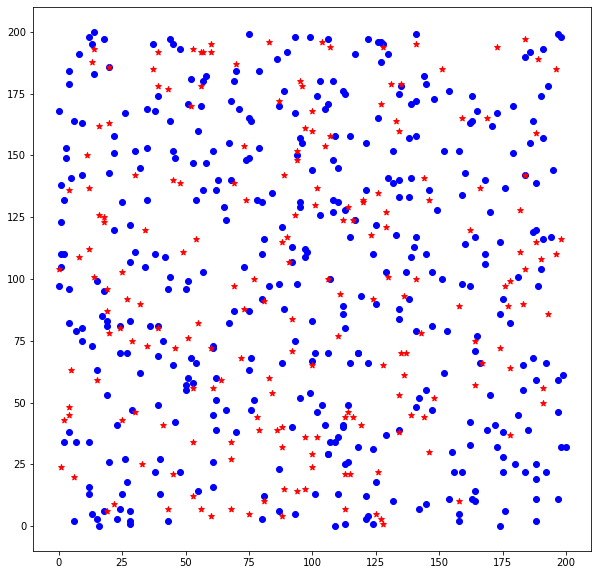

In [29]:
fig, ax = plt.subplots(figsize = (10,10))

start = time.time()
times = []

init_fermions = len(my_uni.fermions)
init_bosons = len(my_uni.bosons)

for i in range(100):
    
    # RUN YOUR ABM
    my_uni.evolve()
    
    for _ in my_uni.fermions:
        init_fermions -= 1
    for _ in my_uni.bosons:
        init_bosons  += 1
    
    # Animation part: Comment this part if you want it to go faster
    plt.title(f"Time = {i}")
    clear_output(wait=True) # Clear output for dynamic display
    display(fig)            # Reset display
    fig.clear()             # Prevent overlapping and layered plots
        
    end = time.time()
    times.append(end-start)
my_uni.draw()
print("Total time =", end-start)    
print(times)
print(abs(init_fermions), init_bosons)

**&#9989; Question 4.3.2 (3 points):**
1. How many bosons have been created in total, if any?

    So in the beginning we had a total of 200 bosons and at the end we have 20200 so 20000 new bosons were created.



2. How many fermions have been annihilated in total, if any?

    We started with a total of 400 fermions and at the end we got the -39600. This means 39,200 were annihilated.



3. What can you do to speed up your simulation? (Beside commenting out the animation part)

    Draw function takes a long time to work. Commenting it or having it outside the for loop will be much faster.

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "Committing part 4", merge the changes in the main branch, and push the changes to GitHub.

---

---
## Assignment wrap-up

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [30]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.office.com/Pages/ResponsePage.aspx?id=MHEXIi9k2UGSEXQjetVofVWe89dpqk1HpKW7eyyv-IhURDZRWEZYMFJISDhWN0FNTjJOSFhDREc0Mi4u"
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

### Congratulations, you're done!

Submit this assignment by uploading it to the course Desire2Learn web page.  Go to the "Homework Assignments" folder, find the dropbox link for Homework #2, and upload **your notebook, your standard_model.py, and your universe.py scripts** there.

&#169; Copyright 2021,  Department of Computational Mathematics, Science and Engineering at Michigan State University